In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)
y= 4 + 3*X + np.random.rand(100, 1)

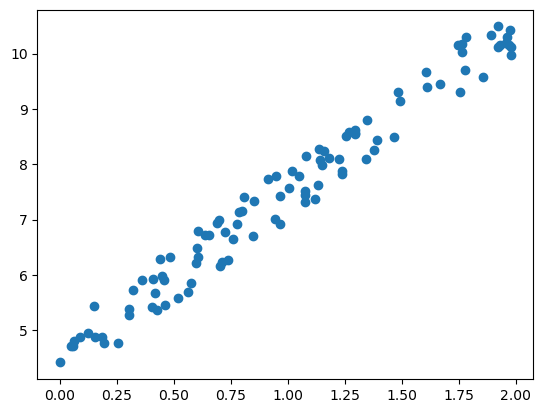

In [3]:
plt.scatter(X, y)

## Finding $\hat{\theta}$ using the normal equation

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(f"The best value for theta 0: {theta_best[0][0]}")
print(f"The best value fot theta 1: {theta_best[1][0]}")

The best value for theta 0: 4.531282966409815
The best value fot theta 1: 2.9691002684916903


Predictions using $\hat{\theta}$

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.53128297],
       [10.4694835 ]])

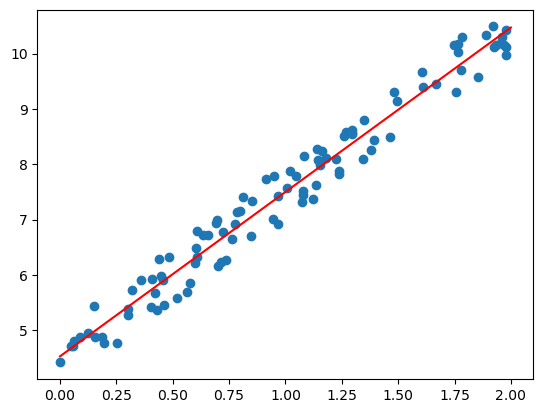

In [6]:
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.show()

## Linear regression using sklearn

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f"Intercept of the regression: {lin_reg.intercept_[0]}")
print(f"Coeficient of the regression: {lin_reg.coef_[0][0]}")

Intercept of the regression: 4.531282966409809
Coeficient of the regression: 2.9691002684916983


In [8]:
lin_reg.predict(X_new)

array([[ 4.53128297],
       [10.4694835 ]])

## Gradient descent

In [9]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

In [10]:
for iteration in range(n_iterations):
    gradients = 2/m* X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[4.53128297],
       [2.96910027]])

## Stochastic Gradient descent

In [12]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)

In [13]:
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    

In [14]:
theta

array([[4.52764807],
       [2.97915039]])

In [15]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_[0], sgd_reg.coef_[0]

(4.527981793572967, 2.98615310332559)

## Polynomial Regression

In [16]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + np.random.rand(m,1)

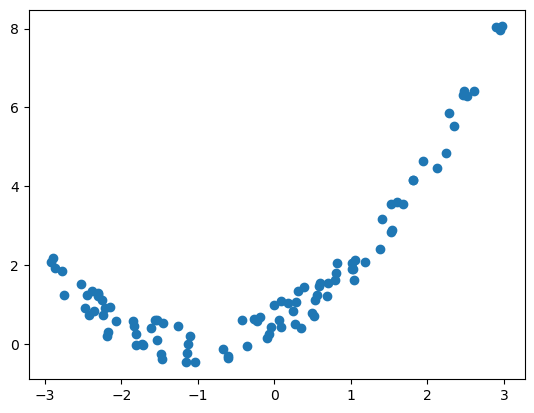

In [36]:
plt.scatter(X, y)
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([0.23760821]), array([0.23760821, 0.05645766]))

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([0.48605322]), array([[1.00246215, 0.51918073]]))

In [32]:
X_new = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_pred = lin_reg.predict(poly_features.transform(X_new))

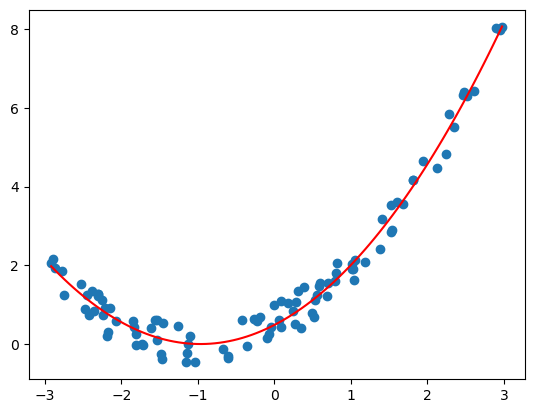

In [35]:
plt.scatter(X, y)
plt.plot(X_new, y_pred, color="red")
plt.show()

## Learning Curves

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plt_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation")
    plt.xlabel("Trainng size")
    plt.ylabel("RMSE")
    plt.legend()

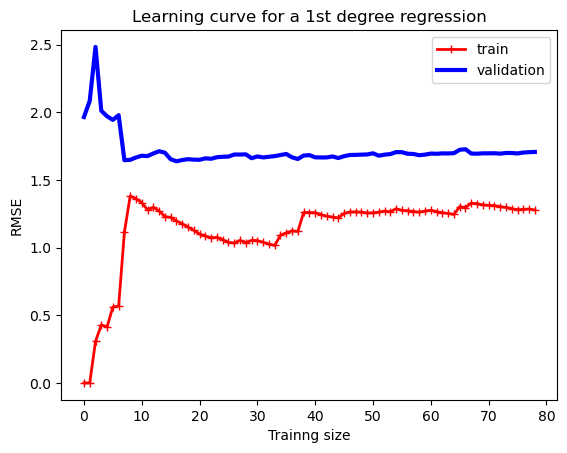

In [ ]:
lin_reg = LinearRegression()
plt.title("Learning curve for a 1st degree regression")
plt_learning_curves(lin_reg, X, y)

This learning curve represents a model that is underfitted. When sample sizes are few, the model perfectly guesses the train set, but struggles with the test. As the training size increases, they both reach a plateu, generally symbolizing underfitting

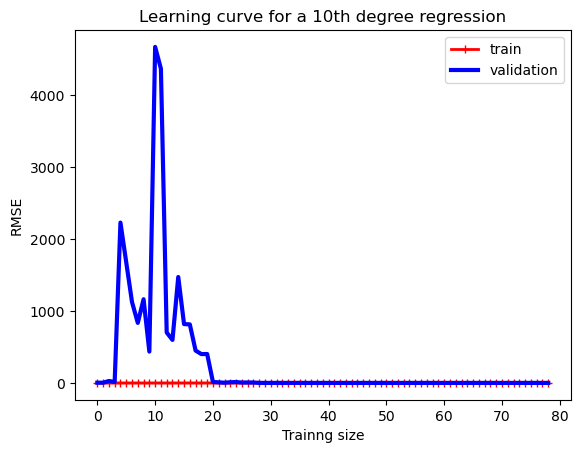

In [55]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()) 
])

plt.title("Learning curve for a 10th degree regression")
plt_learning_curves(polynomial_regression, X, y)

In this model we can see that with a small sample size, the model tends to overfit drastrically. Having an enormous RMSE on the validation set.

## Regularized Linear Models

### Ridge Regression

In [57]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[3.19634719]])

In [59]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.14201457])

## Lasso Regression

In [60]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([3.13889931])

In [61]:
sgd_lass = SGDRegressor(penalty="l1")
sgd_lass.fit(X, y.ravel())
sgd_lass.predict([[1.5]])

array([3.17213228])